# Read the data and get an overview

In [51]:
# link to the dataset, https://www.kaggle.com/c/sberbank-russian-housing-market. The file used in this project is train.csv.
import pandas as pd
df = pd.read_csv('sberbank.csv')

In [52]:
print("shape:", df.shape)

shape: (30471, 292)


In [53]:
print("Column Headers\n", df.columns)

Column Headers
 Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


In [54]:
print(df.dtypes)

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [55]:
print(df.head(10))

   id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   
5   6  2011-09-06       67     46.0   14.0        NaN       NaN         NaN   
6   7  2011-09-08       25     14.0   10.0        NaN       NaN         NaN   
7   8  2011-09-09       44     44.0    5.0        NaN       NaN         NaN   
8   9  2011-09-10       42     27.0    5.0        NaN       NaN         NaN   
9  10  2011-09-13       36     21.0    9.0        NaN       NaN         NaN   

   num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0       NaN       NaN  ...                           9   
1       NaN   

# Check the missing data

In [56]:
print(df.isnull().sum())

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64


In [57]:
import numpy as np
for cols in df.columns:
    pct_missing = (df[cols].isnull().sum())/df.shape[0]
    print(cols , round(pct_missing, 2))

id 0.0
timestamp 0.0
full_sq 0.0
life_sq 0.21
floor 0.01
max_floor 0.31
material 0.31
build_year 0.45
num_room 0.31
kitch_sq 0.31
state 0.44
product_type 0.0
sub_area 0.0
area_m 0.0
raion_popul 0.0
green_zone_part 0.0
indust_part 0.0
children_preschool 0.0
preschool_quota 0.22
preschool_education_centers_raion 0.0
children_school 0.0
school_quota 0.22
school_education_centers_raion 0.0
school_education_centers_top_20_raion 0.0
hospital_beds_raion 0.47
healthcare_centers_raion 0.0
university_top_20_raion 0.0
sport_objects_raion 0.0
additional_education_raion 0.0
culture_objects_top_25 0.0
culture_objects_top_25_raion 0.0
shopping_centers_raion 0.0
office_raion 0.0
thermal_power_plant_raion 0.0
incineration_raion 0.0
oil_chemistry_raion 0.0
radiation_raion 0.0
railroad_terminal_raion 0.0
big_market_raion 0.0
nuclear_reactor_raion 0.0
detention_facility_raion 0.0
full_all 0.0
male_f 0.0
female_f 0.0
young_all 0.0
young_male 0.0
young_female 0.0
work_all 0.0
work_male 0.0
work_female 0.0
e

# Drop unnecessary features

In [58]:
# drop the features that does not provide useful information
cols = df.columns   
remove = cols[30:]
df.drop(remove, inplace=True, axis=1)
print(df.shape)

(30471, 30)


In [59]:
# drop a column by its column name
remove = ['hospital_beds_raion']
df.drop(remove, inplace=True, axis=1)
print(df.shape)

(30471, 29)


# Drop rows with missing values

In [60]:
# drop rows with over 5 missing values across the columns
df_lessmissingvalue = df.dropna(axis=0, thresh = 24)    # 29columns - 5 columns = 24
df_lessmissingvalue.shape

(20899, 29)

In [61]:
# drop rows if missing values are present in build-year
df_lessmissingvalue2 = df_nomissingvalue.dropna(subset=['build_year'])
df_lessmissingvalue2.shape

(16866, 29)

# Replace missing values with zero or the most frequent value

In [64]:
med = df_lessmissingvalue2['num_room'].median()
print(med)
df_lessmissingvalue2['num_room'].fillna(med, inplace = True)

2.0


In [65]:
df_lessmissingvalue2.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25
8056,8059,2013-05-21,11,11.0,2.0,5.0,2.0,1907.0,1.0,12.0,...,5,7538,9337.0,8,1,5,1,23,2,yes
8135,8138,2013-05-25,53,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,...,5,4583,7236.0,5,0,3,0,4,3,no
8153,8156,2013-05-27,77,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,...,0,469,NaN,0,0,0,0,0,2,no
8154,8157,2013-05-27,45,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,...,6,4798,7653.0,6,0,2,0,6,1,no
8175,8178,2013-05-28,38,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,...,5,3889,4904.0,5,0,3,0,18,1,no
8186,8189,2013-05-28,63,NaN,17.0,17.0,4.0,2013.0,2.0,1.0,...,5,1564,7377.0,5,0,0,0,0,4,no
8255,8258,2013-05-30,74,46.0,12.0,24.0,1.0,2004.0,3.0,9.0,...,4,4860,6476.0,4,1,0,0,4,2,no
8268,8271,2013-05-31,93,93.0,3.0,1.0,1.0,2013.0,3.0,1.0,...,0,475,NaN,0,0,0,0,0,0,no
8282,8285,2013-06-01,51,30.0,7.0,17.0,1.0,2003.0,2.0,9.0,...,5,7065,9700.0,5,0,2,0,4,3,no
8287,8290,2013-06-03,77,50.0,3.0,5.0,2.0,1957.0,3.0,8.0,...,3,4231,4975.0,6,1,0,1,4,3,no


# Remove Duplicates

In [66]:
df_deldup = df_lessmissingvalue2.drop_duplicates(subset = ['id'], keep = 'last')
print(df_lessmissingvalue2.shape)
print(df_deldup.shape)

(16866, 29)
(16866, 29)


# Tidying up Fields in the Data

In [67]:
# We have to check the data format. One common problem is the dtype of a date field. If it is an object, which is roughly analogous to str in native Python, you shall convert a date field from string to DateTime format.
print(df_deldup['build_year'].dtype)

float64


In [68]:
print(df_deldup['timestamp'].dtype)

object


In [69]:
df_deldup['timestamp_dt'] = pd.to_datetime(df_deldup['timestamp'], format='%Y-%m-%d')
df_deldup['year'] = df_deldup['timestamp_dt'].dt.year
df_deldup['month'] = df_deldup['timestamp_dt'].dt.month
print(df_deldup['year'].value_counts(dropna=False))

2014    11091
2013     3223
2015     2552
Name: year, dtype: int64


In [71]:
# Often, we shall check categorical values. A categorical feature has a limited number of values. Sometimes there may be other values due to reasons such as typos.
df_deldup['product_type'].head(20)     # This field looks correct.  

8056       Investment
8135       Investment
8153    OwnerOccupier
8154       Investment
8175       Investment
8186    OwnerOccupier
8255       Investment
8268    OwnerOccupier
8282       Investment
8287       Investment
8293       Investment
8350       Investment
8362       Investment
8367       Investment
8374       Investment
8381       Investment
8387       Investment
8391       Investment
8410       Investment
8423       Investment
Name: product_type, dtype: object

In [72]:
df_deldup['state'].head(20)

8056    3.0
8135    3.0
8153    1.0
8154    3.0
8175    NaN
8186    1.0
8255    3.0
8268    1.0
8282    3.0
8287    2.0
8293    3.0
8350    3.0
8362    3.0
8367    2.0
8374    NaN
8381    NaN
8387    2.0
8391    3.0
8410    2.0
8423    3.0
Name: state, dtype: float64

In [47]:
df_deldup['sub_area'].head(40)

8056                   Hamovniki
8135                   Lianozovo
8153     Poselenie Voskresenskoe
8154             Severnoe Butovo
8175              Filevskij Park
8186                  Nekrasovka
8255          Juzhnoe Medvedkovo
8268      Poselenie Pervomajskoe
8282                    Solncevo
8287                   Ajeroport
8293    Orehovo-Borisovo Juzhnoe
8350                    Nagornoe
8362                     Mar'ino
8367                    Strogino
8374         Chertanovo Severnoe
8381                    Shhukino
8387          Horoshevo-Mnevniki
8391                     Ramenki
8410             Preobrazhenskoe
8423                 Dmitrovskoe
8424                      Mitino
8426                      Mitino
8427                    Kon'kovo
8451        Poselenie Moskovskij
8452                       Sokol
8470                Ostankinskoe
8476             Juzhnoe Tushino
8498         Vostochnoe Degunino
8499                    Bibirevo
8501                   Rostokino
8509      

In [73]:
print(df_deldup['sub_area'].value_counts(dropna=False))
df_deldup['sub_area'] = df_deldup['sub_area'].str.lower()
print(df_deldup['sub_area'].value_counts(dropna=False))

Poselenie Vnukovskoe              453
Nekrasovka                        446
Poselenie Sosenskoe               439
Mitino                            366
Mar'ino                           364
                                 ... 
Molzhaninovskoe                     3
Poselenie Kievskij                  2
Poselenie Klenovskoe                1
Poselenie Mihajlovo-Jarcevskoe      1
Poselenie Shhapovskoe               1
Name: sub_area, Length: 146, dtype: int64
poselenie vnukovskoe              453
nekrasovka                        446
poselenie sosenskoe               439
mitino                            366
mar'ino                           364
                                 ... 
molzhaninovskoe                     3
poselenie kievskij                  2
poselenie klenovskoe                1
poselenie mihajlovo-jarcevskoe      1
poselenie shhapovskoe               1
Name: sub_area, Length: 146, dtype: int64


# Detect Outliers

<AxesSubplot:>

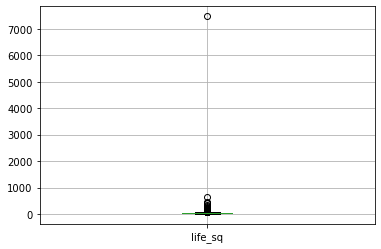

In [74]:
df_deldup.boxplot(column=['life_sq'])

<AxesSubplot:>

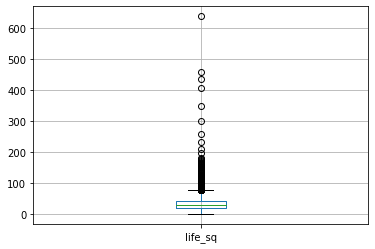

In [75]:
df_nooutlier = df_deldup[df_deldup['life_sq'] < 1000]
df_nooutlier.boxplot(column=['life_sq'])

# Data Summarization

In [76]:
# Get basic descriptive statistics of numeric features
df_nooutlier['life_sq'].describe()

count    16087.000000
mean        33.726612
std         19.610892
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max        637.000000
Name: life_sq, dtype: float64

In [77]:
df_nooutlier['life_sq'].median()

30.0

In [79]:
# Data Aggregation for categorical features.
df_bypropertytype = df_nooutlier.groupby('product_type')

print('mean of square meters by property types\n', df_bypropertytype['life_sq'].mean())

mean of square meters by property types
 product_type
Investment       31.135301
OwnerOccupier    47.362009
Name: life_sq, dtype: float64
